# Modelos de Regressão de dados
<blockquote> Um importante fator para modelos de machine Learning é a regressão de dados, ou seja, o feedback, se a predição for verdadeira ou falsa, essa resposta pode alterar significativamente o seu próprio algoritimo

# Regressão linear
<blockquote> Nesse modo a ML funcionará na tentativa de encontrar a função linear que separa dois diferentes grupos, alterando os coeficientes <code>linear</code> e <code>angular</code> a cada resposta negativa<br>
    Então a regressão linear precisa encontrar o A e B da função: 
    <li><code> Y = A + Bx</code></li>
Para descobrir esses valores é tirada a variancia dos erros em relação a função, quando este é minimo melhor o modelo de regressão

In [100]:
import pandas as pd

In [101]:
auto_data = pd.read_csv('auto_clean.csv')

In [102]:
auto_data

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.470000,2.68,9.00,111.000000,5000.000000,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.470000,2.68,9.00,111.000000,5000.000000,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.680000,3.47,9.00,154.000000,5000.000000,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.190000,3.40,10.00,102.000000,5500.000000,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.190000,3.40,8.00,115.000000,5500.000000,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,0.920833,53.1,2507,ohc,five,136,mpfi,3.190000,3.40,8.50,110.000000,5500.000000,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,0.991667,55.7,2844,ohc,five,136,mpfi,3.190000,3.40,8.50,110.000000,5500.000000,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,0.991667,55.7,2954,ohc,five,136,mpfi,3.190000,3.40,8.50,110.000000,5500.000000,19,25,18920.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,0.991667,55.9,3086,ohc,five,131,mpfi,3.130000,3.40,8.30,140.000000,5500.000000,17,20,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,0.900000,54.3,2395,ohc,four,108,mpfi,3.500000,2.80,8.80,101.000000,5800.000000,23,29,16430.0,10.217391,Low,0,1


In [103]:
import numpy as np

auto_data = auto_data.replace('?', np.nan)
auto_data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [104]:
auto_data.describe(include='all')

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,201.000000,201.00000,201,201,201,201,201,201,201.000000,201.000000,201.000000,201.000000,201.000000,201,201,201.000000,201,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,200,201.000000,201.000000
unique,NaN,NaN,22,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,toyota,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,32,165,115,94,118,198,NaN,NaN,NaN,NaN,NaN,145,157,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,0.915126,53.766667,2555.666667,NaN,NaN,126.875622,NaN,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,NaN,0.099502,0.900498
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,0.029187,2.447822,517.296727,NaN,NaN,41.546834,NaN,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,NaN,0.300083,0.300083
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.837500,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,NaN,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,0.890278,52.000000,2169.000000,NaN,NaN,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,NaN,0.000000,1.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.909722,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,NaN,0.000000,1.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,0.925000,55.500000,2926.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,NaN,0.000000,1.000000


In [105]:
auto_data = auto_data.drop('normalized-losses', axis=1)

auto_data.head()

,symboling,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [106]:
auto_data['num-of-cylinders'].describe()    

count      201
unique       7
top       four
freq       157
Name: num-of-cylinders, dtype: object

In [107]:
cylinders_dict = {'two': 2,
                 'three': 3,
                 'four': 4,
                 'five': 5,
                 'six': 6,
                 'eight':8,
                  'twelve':12}
auto_data['num-of-cylinders'].replace(cylinders_dict, inplace=True)
auto_data.head()

,symboling,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [108]:
auto_data = pd.get_dummies(auto_data, columns=['make',
                                              'aspiration',
                                              'num-of-doors',
                                              'body-style',
                                              'drive-wheels',
                                              'engine-location', 
                                              'engine-type',
                                              'fuel-system',
                                              'horsepower-binned'])
auto_data.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,horsepower-binned_High,horsepower-binned_Low,horsepower-binned_Medium
0,3,88.6,0.811148,0.890278,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,3,88.6,0.811148,0.890278,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,94.5,0.822681,0.909722,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,2,99.8,0.848630,0.919444,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,2,99.4,0.848630,0.922222,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [109]:
pd.set_option('display.max_columns', None)

In [110]:
auto_data = auto_data.dropna()
auto_data

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,horsepower-binned_High,horsepower-binned_Low,horsepower-binned_Medium
0,3,88.6,0.811148,0.890278,48.8,2548,4,130,3.47,2.68,9.00,111.000000,5000.000000,21,27,13495.0,11.190476,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,3,88.6,0.811148,0.890278,48.8,2548,4,130,3.47,2.68,9.00,111.000000,5000.000000,21,27,16500.0,11.190476,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,94.5,0.822681,0.909722,52.4,2823,6,152,2.68,3.47,9.00,154.000000,5000.000000,19,26,16500.0,12.368421,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,2,99.8,0.848630,0.919444,54.3,2337,4,109,3.19,3.40,10.00,102.000000,5500.000000,24,30,13950.0,9.791667,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,2,99.4,0.848630,0.922222,54.3,2824,5,136,3.19,3.40,8.00,115.000000,5500.000000,18,22,17450.0,13.055556,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,2,99.8,0.851994,0.920833,53.1,2507,5,136,3.19,3.40,8.50,110.000000,5500.000000,19,25,15250.0,12.368421,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6,1,105.8,0.925997,0.991667,55.7,2844,5,136,3.19,3.40,8.50,110.000000,5500.000000,19,25,17710.0,12.368421,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
7,1,105.8,0.925997,0.991667,55.7,2954,5,136,3.19,3.40,8.50,110.000000,5500.000000,19,25,18920.0,12.368421,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
8,1,105.8,0.925997,0.991667,55.9,3086,5,131,3.13,3.40,8.30,140.000000,5500.000000,17,20,23875.0,13.823529,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
9,2,101.2,0.849592,0.900000,54.3,2395,4,108,3.50,2.80,8.80,101.000000,5800.000000,23,29,16430.0,10.217391,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [111]:
auto_data[auto_data.isna().any(axis=1)]

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,horsepower-binned_High,horsepower-binned_Low,horsepower-binned_Medium


In [112]:
from sklearn.model_selection import train_test_split

X = auto_data.drop('price', axis=1)

# O que queremos prever
Y = auto_data['price']

# Serparando 80% dos dados para treinamento e 20% para teste
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [113]:
from sklearn.linear_model import LinearRegression

# Utilizando a regressão linar do sklearn
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
# Para saber o quão eficiente é o modelo basta:
linear_model.score(X_train, Y_train)

0.9730966115225368

In [117]:
# Os coeficientes de cada coluna
linear_model.coef_

array([-7.52409207e+02,  9.85751516e+01, -1.38480553e+04,  8.95728084e+03,
       -3.29446758e+02,  4.94337762e+00, -1.65341675e+03,  1.93139641e+02,
       -8.79193527e+03, -2.45793496e+03, -1.64579459e+02, -4.67810239e+01,
        2.47827821e+00,  1.53403468e+02,  1.29394333e+02,  9.86137588e+02,
        3.52158609e+02, -3.52158609e+02,  1.81897796e+02,  4.99986192e+03,
        6.48425966e+03, -2.96507032e+03, -3.05844177e+03,  5.32665755e+01,
       -4.71696029e+03, -1.81328086e+03,  5.35370568e+02,  4.63925489e+03,
        8.02034371e+02, -3.01626323e+03, -3.15312030e+02, -7.56758852e+03,
       -3.66838755e+03,  3.70755645e+03,  8.11162040e+02,  7.26896967e+03,
       -1.48350277e+03, -1.28651629e+03, -2.49592564e+02,  6.57282261e+02,
       -1.80507227e+03,  1.80507227e+03,  2.35853083e+01, -2.35853083e+01,
        2.72705625e+03, -3.90607423e+02, -8.09414409e+02, -6.36415393e+02,
       -8.90619025e+02, -2.35963206e+01, -1.06744674e+03,  1.09104306e+03,
       -3.70755645e+03,  

In [118]:
predictors = X_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

length                     -13848.055350
bore                        -8791.935266
make_peugot                 -7567.588524
make_isuzu                  -4716.960285
engine-type_ohcv            -4150.312917
engine-location_front       -3707.556453
make_plymouth               -3668.387548
fuel-system_1bbl            -3103.889263
make_dodge                  -3058.441773
make_mitsubishi             -3016.263233
make_chevrolet              -2965.070320
stroke                      -2457.934962
make_jaguar                 -1813.280862
aspiration_std              -1805.072265
num-of-cylinders            -1653.416746
make_subaru                 -1483.502769
engine-type_dohc            -1462.689661
make_toyota                 -1286.516289
drive-wheels_fwd            -1067.446743
body-style_wagon             -890.619025
body-style_hatchback         -809.414409
symboling                    -752.409207
body-style_sedan             -636.415393
body-style_hardtop           -390.607423
gas             

In [119]:
# Prevendo os dados com base no nosso teste
y_predict = linear_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


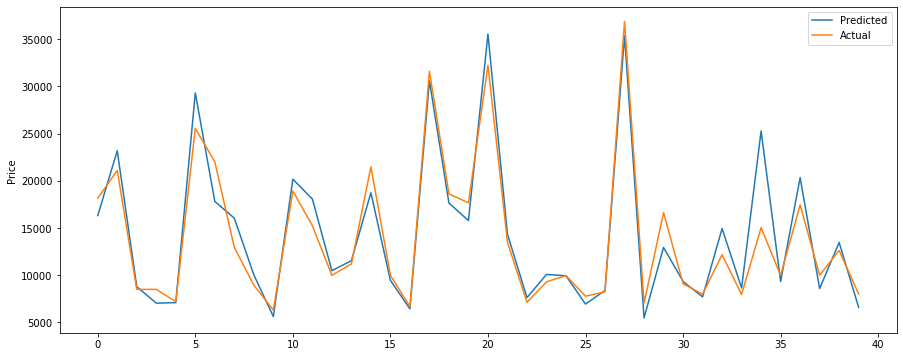

In [121]:
# Gerando um gráfico com a diferença da predição com seus valores corretos
%pylab inline 
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

In [122]:
r_square = linear_model.score(x_test, y_test)
r_square

0.8949615762901797

<blockquote> Perceba que o a taxa de acerto foi de quase 90% o que nos dá um bom modelo de regressão linear, mas que ainda pode melhorar

In [123]:
from sklearn.metrics import mean_squared_error

# Essa função nos da a variancia do nosso modelo preditivo
linear_model_mse = mean_squared_error(y_predict, y_test)
linear_model_mse

5858714.533087485

In [124]:
# Para descobrir o desvio padrão do modelo basta tirar a raiz quadrada
import math
math.sqrt(linear_model_mse)

2420.478162076139

<blockquote> Isso significa que o desvio padrão é de 2,420 dolares